In [309]:

%matplotlib notebook
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as pyplot
import numpy.random as random
import sounddevice as sd

def dtft(x, samples = 1000):
    wAxis = np.linspace(0, 2 * np.pi, samples)
    n = np.arange(0, x.size)
    result = np.empty(wAxis.size)
    for i, w in enumerate(wAxis):
        result[i] = np.dot(x, np.e **(-1j * w * n)) 
        
    return wAxis, result

cMajor = [261.6256, 293.6648, 329.6276, 349.2282, 391.9954, 440.0000, 493.8833, 523.2511]

<IPython.core.display.Javascript object>


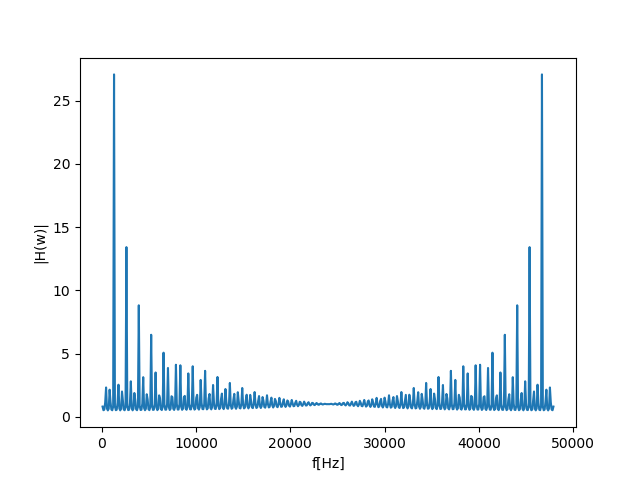

<IPython.core.display.Javascript object>


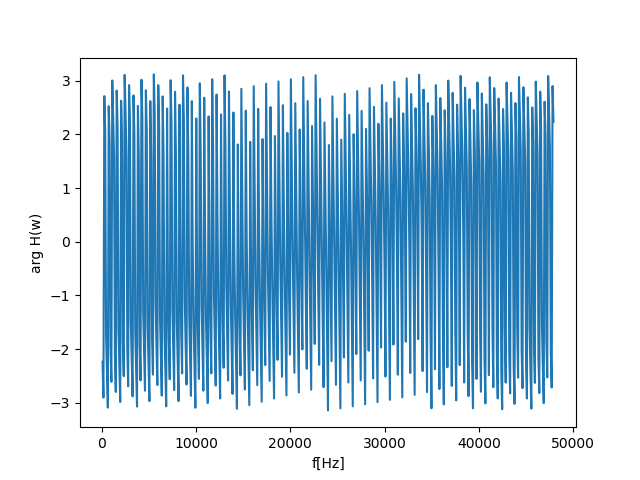

In [196]:
# 2 Tacka

f = 440
FS = 48000
N = round(FS / f - 0.5)
b = np.zeros(N + 1)
b[N] = 2
a = np.zeros(N + 2)
(a[0], a[N], a[N + 1]) = (2, -1, -1)
(w, H) = signal.freqz(b, a, 512, True)
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("|H(f)|")
freqAxis = (w * FS) / (2 * np.pi)
pyplot.plot(freqAxis, np.abs(H))
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("arg H(f)")
pyplot.plot(freqAxis, np.angle(H))

In [235]:
# Tacka 3
def karplusStrong(f, fs, l):
    N = round(fs / f - 0.5)
    actualFreq = FS / (N + 0.5)
    (b, a) = (np.zeros(N + 1), np.zeros(N + 2))
    (b[N], a[0], a[N], a[N + 1]) = (2, 2, -1, -1)
    totalSamples = round(l * fs)
    noise = random.normal(0, 1, N)
    inputNoise = np.concatenate((noise, np.zeros(totalSamples - N)))
    result = signal.lfilter(b, a, inputNoise)
    normalized = (result / np.amax(np.abs(result)))
    time = np.linspace(0, l, totalSamples)
    return time, actualFreq, normalized

<IPython.core.display.Javascript object>


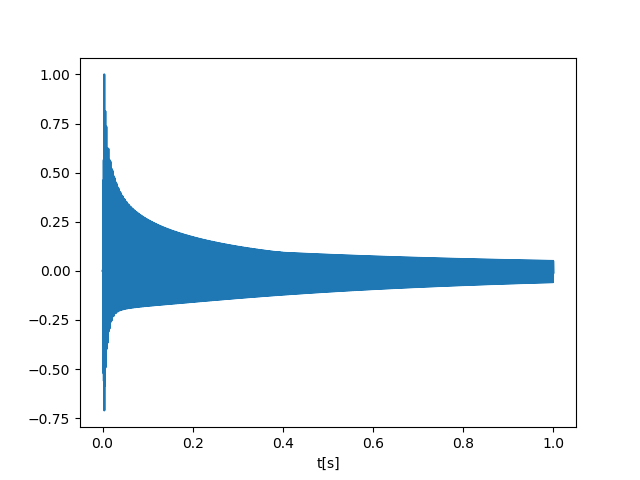

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


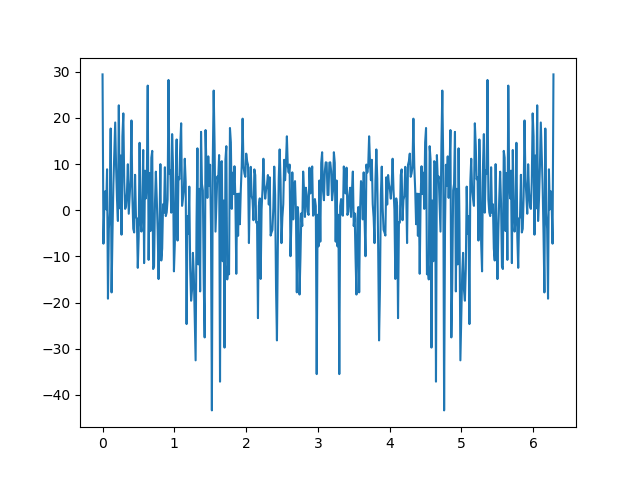

In [276]:
# Tacka 4
l = 1
FS = 48000
(time, actualFreq, synth) = karplusStrong(440, FS, l)
sd.play(synth, FS)
pyplot.figure()
pyplot.xlabel("t[s]")
pyplot.plot(time, synth)
# DTFT OK?
w, X = dtft(synth, 500)
pyplot.figure()
pyplot.plot(w, 20 * np.log10(np.abs(X)))

In [312]:
# Tacka 5

cMajorActualFreq = []
FS = 48000
l = 0.8
result = np.array([])
for i, freq in enumerate(cMajor):
    time, actualFreq, synth = karplusStrong(freq, FS, l)
    if i <= 7:
        cMajorActualFreq.append(actualFreq)
    result = np.concatenate((result, synth))
sd.play(result, FS)

wavfile.write("c major.wav", FS, result.astype(np.float32))
print("C major frequencies: ", cMajor)
print("Actual frequencies: ", cMajorActualFreq)
print("Difference", np.abs(np.array(cMajor) - np.array(cMajorActualFreq)))

C major frequencies:  [261.6256, 293.6648, 329.6276, 349.2282, 391.9954, 440.0, 493.8833, 523.2511]
Actual frequencies:  [261.58038147138967, 293.57798165137615, 329.89690721649487, 349.09090909090907, 391.83673469387753, 438.35616438356163, 492.3076923076923, 524.5901639344262]
Difference [0.04521853 0.08681835 0.26930722 0.13729091 0.15866531 1.64383562
 1.57560769 1.33906393]


<IPython.core.display.Javascript object>


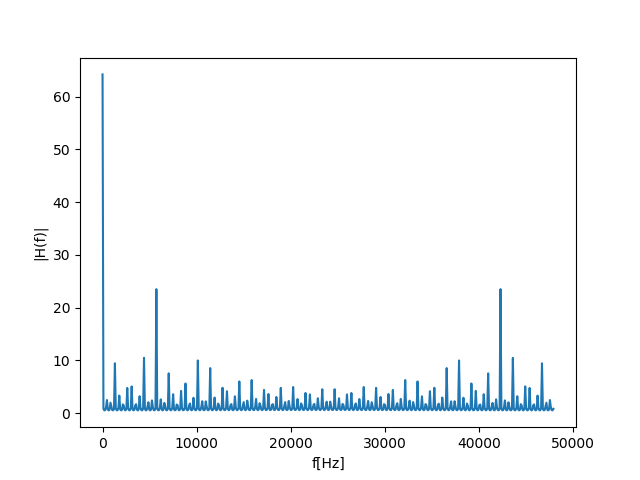

<IPython.core.display.Javascript object>


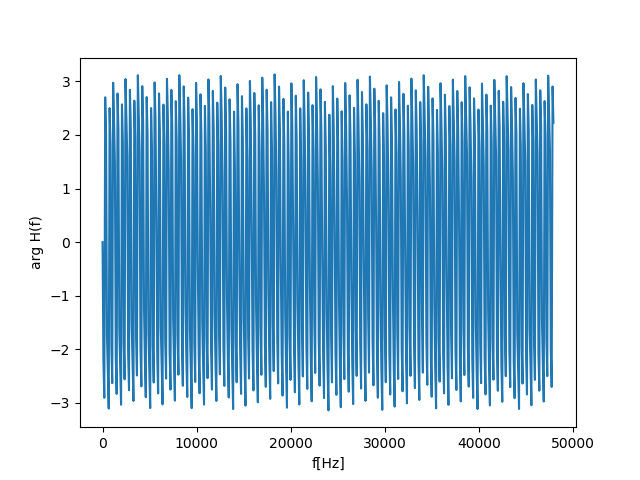

In [297]:
f = 440
FS = 48000

S = 0.1
t60 = 1
N = round(FS / f - 0.5)
b = np.zeros(N + 1)
a = np.zeros(N + 2)
ro = 0.001 ** (1 / (f * t60))

(b[N], a[0], a[N], a[N + 1]) = (1, 1, -ro * (1 - S), -ro * S)
(w, H) = signal.freqz(b, a, 512, True)
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("|H(f)|")
freqAxis = (w * FS) / (2 * np.pi)
pyplot.plot(freqAxis, np.abs(H))
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("arg H(f)")
pyplot.plot(freqAxis, np.angle(H))

In [298]:
# Tacka 6
def karplusStrong2(f, fs, l, S, t60):
    N = round(fs / f - 0.5)
    actualFreq = FS / (N + 0.5)
    b = np.zeros(N + 1)
    a = np.zeros(N + 2)
    ro = 0.001 ** (1 / (f * t60))
    (b[N], a[0], a[N], a[N + 1]) = (1, 1, -ro * (1 - S), -ro * S)
    totalSamples = round(l * fs)
    noise = random.normal(0, 1, N)
    inputNoise = np.concatenate((noise, np.zeros(totalSamples - N)))
    result = signal.lfilter(b, a, inputNoise)
    normalized = (result / np.amax(np.abs(result)))
    time = np.linspace(0, l, totalSamples)
    return time, actualFreq, normalized

In [303]:
f = 440
FS = 48000
l = 3
params = [(0.1, 1,), (0.2, 1), (0.4, 1), (0.5, 1), 
          (0.8, 1), (0.9, 1), (0.5, 0.5), (0.5, 1), (0.5, 1.5), (0.5, 2)]

for param in params:
    synth = karplusStrong2(f, FS, l, param[0], param[1])[2]
    print(f"S = {param[0]}, t60 = {param[1]}")
    sd.play(synth, FS)
    sd.wait()

S = 0.1, t60 = 1
S = 0.2, t60 = 1
S = 0.4, t60 = 1
S = 0.5, t60 = 1
S = 0.8, t60 = 1
S = 0.9, t60 = 1
S = 0.5, t60 = 0.5
S = 0.5, t60 = 1
S = 0.5, t60 = 1.5
S = 0.5, t60 = 2
S = 0.5, t60 = 2.5
S = 0.5, t60 = 3


In [317]:
# Tacka 7
FS = 48000
l = 0.8
S = 0.5
t60 = 2
params = [(0.1, 1,), (0.2, 1), (0.4, 1), (0.5, 1), 
          (0.8, 1), (0.9, 1), (0.5, 0.5), (0.5, 1), (0.5, 1.5), (0.5, 2)]

def generateCMajor(FS, l, S, t60):
    result = np.array([])
    for freq in cMajor:
        synth = karplusStrong2(freq, FS, l, S, t60)[2]
        result = np.concatenate((result, synth))
    return result

for param in params:
    print(f"S = {param[0]}, t60 = {param[1]}")
    cMajorSynth = generateCMajor(FS, l, param[0], param[1])
    sd.playa(cMajorSynth, FS)
    wavfile.write(f"c major_S={S}_t60={t60}.wav", FS, cMajorSynth.astype(np.float32))
    sd.wait()

S = 0.1, t60 = 1
S = 0.2, t60 = 1
S = 0.4, t60 = 1
S = 0.5, t60 = 1
S = 0.8, t60 = 1
S = 0.9, t60 = 1
S = 0.5, t60 = 0.5
S = 0.5, t60 = 1
S = 0.5, t60 = 1.5
S = 0.5, t60 = 2
